In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Weed_Price.csv")
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [3]:
df.shape

(22899, 8)

In [4]:
df.dtypes

State      object
HighQ     float64
HighQN      int64
MedQ      float64
MedQN       int64
LowQ      float64
LowQN       int64
date       object
dtype: object

In [5]:
# Lets load this again with date as date type
df = pd.read_csv("Weed_Price.csv", parse_dates=[-1])

In [6]:
# Now check for type for each row
df.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

In [7]:
# Get the names of all columns
df.columns

Index(['State', 'HighQ', 'HighQN', 'MedQ', 'MedQN', 'LowQ', 'LowQN', 'date'], dtype='object')

In [8]:
# Get the index of all rows
df.index

RangeIndex(start=0, stop=22899, step=1)

In [9]:
# Get specific rows
df[20:25]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20,Montana,279.73,585,257.98,258,734.65,22,2014-01-01
21,Nebraska,352.64,508,247.03,510,142.99,62,2014-01-01
22,Nevada,269.61,899,218.67,928,231.08,61,2014-01-01
23,New Hampshire,366.47,422,289.81,441,561.05,38,2014-01-01
24,New Jersey,354.91,2244,294.39,2799,225.62,185,2014-01-01


In [10]:
# Can we access a specific columns
df["State"]


0              Alabama
1               Alaska
2              Arizona
3             Arkansas
4           California
             ...      
22894         Virginia
22895       Washington
22896    West Virginia
22897        Wisconsin
22898          Wyoming
Name: State, Length: 22899, dtype: object

In [11]:
# Selecting specific column and rows
df[0:5]["State"]


0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

In [12]:
#Getting unique values of State
pd.unique(df['State'])


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [13]:
df.index

RangeIndex(start=0, stop=22899, step=1)

## Slicing columns using pandas

In [14]:
df.loc[0]


State                 Alabama
HighQ                  339.06
HighQN                   1042
MedQ                   198.64
MedQN                     933
LowQ                   149.49
LowQN                     123
date      2014-01-01 00:00:00
Name: 0, dtype: object

In [15]:
df.iloc[0,0]

'Alabama'

In [16]:
df.isnull()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
22894,False,False,False,False,False,True,False,False
22895,False,False,False,False,False,True,False,False
22896,False,False,False,False,False,True,False,False
22897,False,False,False,False,False,True,False,False


## Data Visualisation

In [26]:
df_demo = pd.read_csv(r"Demographics_State.csv")
df.sort_values(['State','date'], inplace=True)
df.fillna(method = "ffill", inplace=True)

In [27]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## Quantiative Variable - Single Variable


In [28]:
# Filter data for location California and calculate the Year
df['year'] = pd.DatetimeIndex(df['date']).year
df_cal = df[df["State"] == "California"]
df_cal.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
20098,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
20863,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
21577,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
22291,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
22801,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


<AxesSubplot:xlabel='date'>

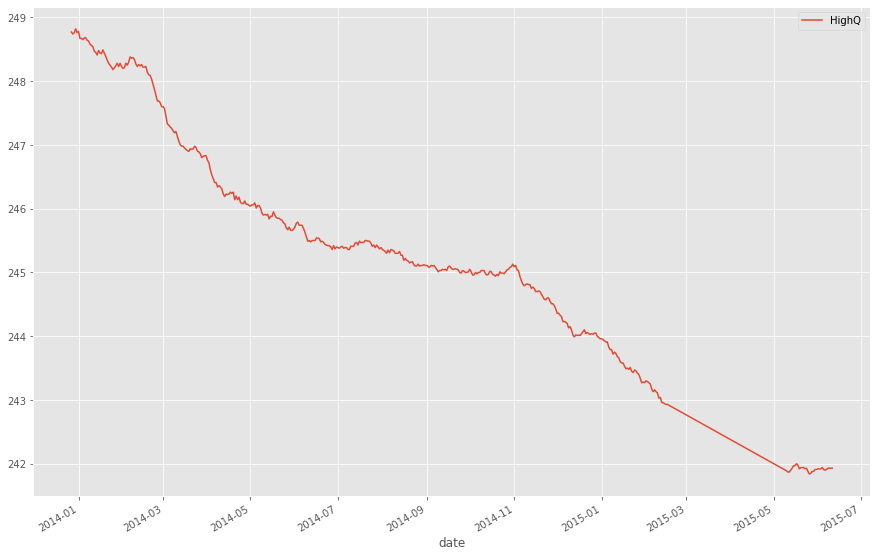

In [29]:
# Plot
df_cal.plot(x = "date", y = "HighQ")

In [30]:
# Set index as date - this is important to get the labels in the plots automatically
df_cal.index = df_cal.date
df_cal.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
date,,,,,,,,,
2013-12-27,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
2013-12-28,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
2013-12-29,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
2013-12-30,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
2013-12-31,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


<AxesSubplot:xlabel='date'>

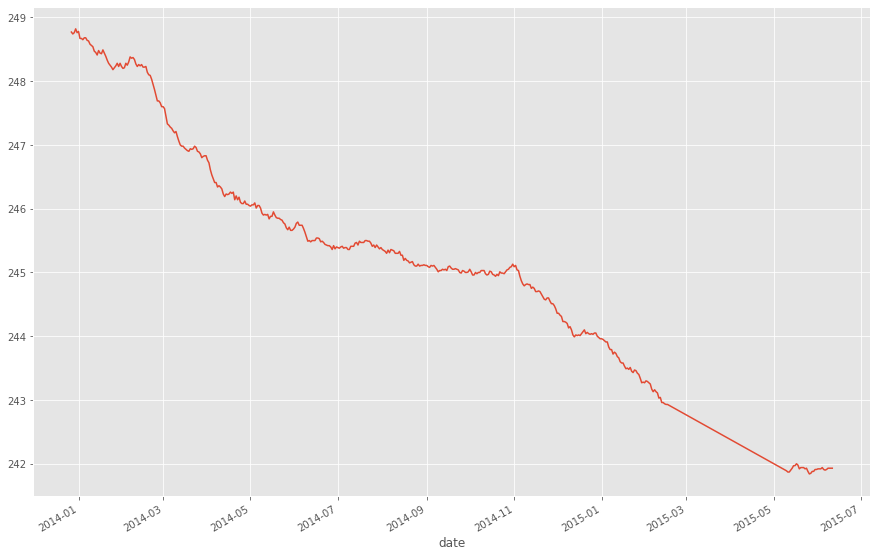

In [31]:
# Lets plot the HighQ prices
df_cal.HighQ.plot()


<AxesSubplot:ylabel='Frequency'>

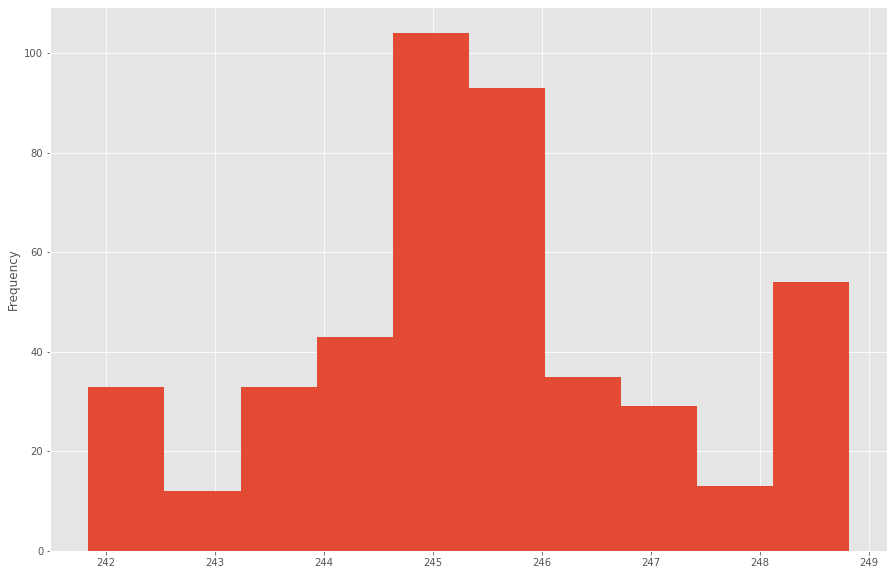

In [32]:
# Lets plot this HighQ as a histogram to see the most common price
df_cal.HighQ.plot(kind = "hist")


<AxesSubplot:ylabel='Frequency'>

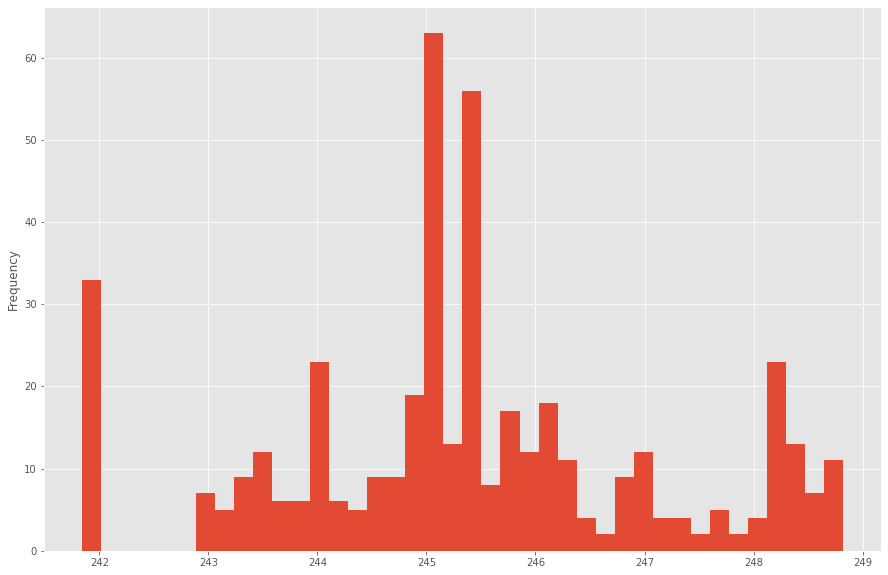

In [33]:
# Lets increase the bins to see some granularity
df_cal.HighQ.plot(kind = "hist", bins = 40)

## Quantiative - Multi Variable

<AxesSubplot:xlabel='date'>

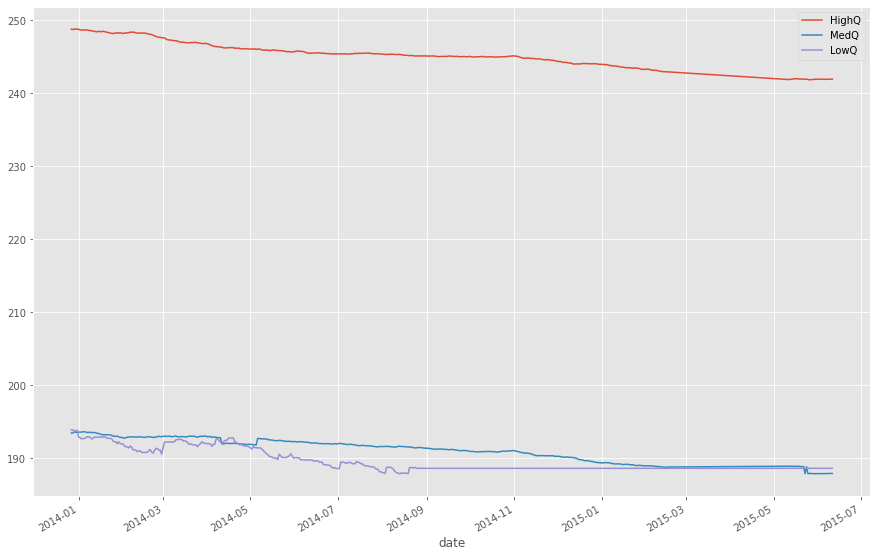

In [34]:
# Lets plot all the three prices in California
df_cal[["HighQ", "MedQ", "LowQ"]].plot()

<AxesSubplot:ylabel='Frequency'>

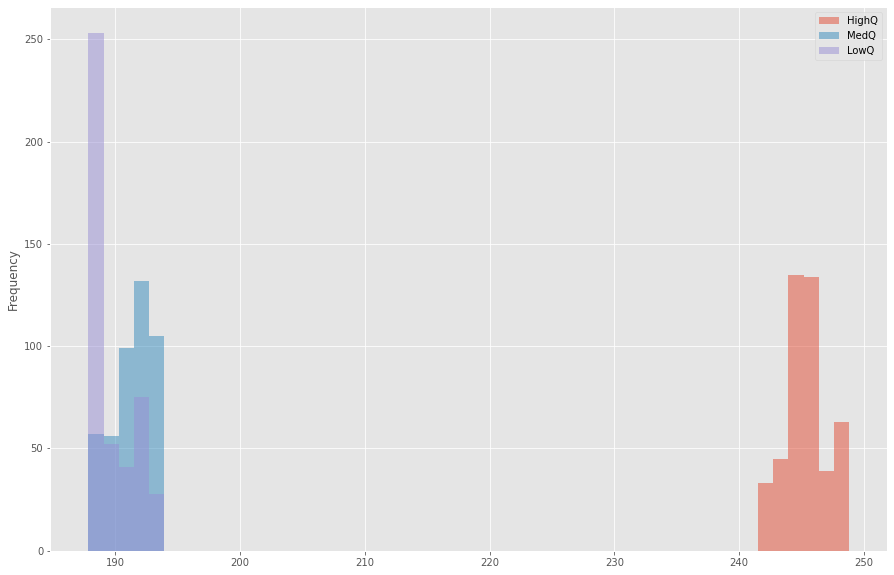

In [35]:
# Lets see the distribution of these prices by using a histogram
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "hist", bins = 50, alpha = 0.5)


## Box Plots

<AxesSubplot:>

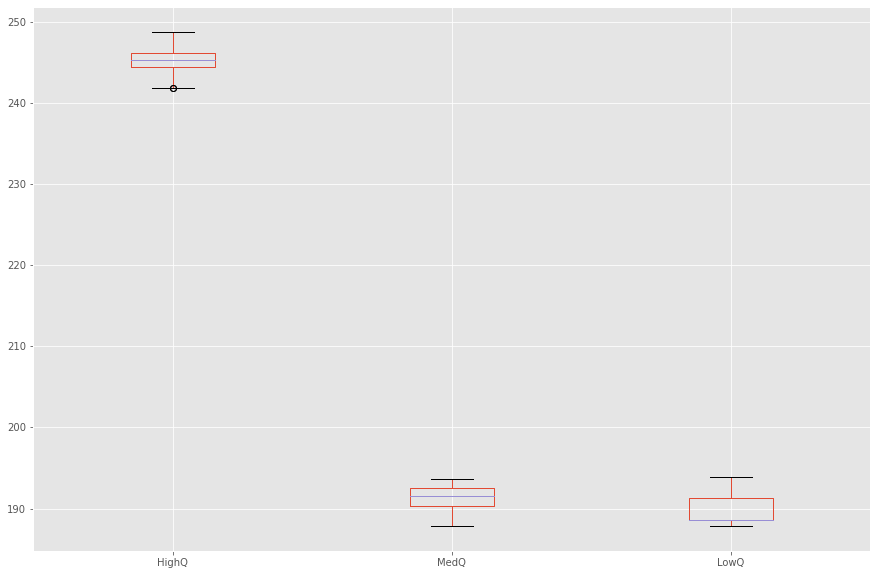

In [36]:
# Lets plot a Box Plot for the prices
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "box")


<AxesSubplot:>

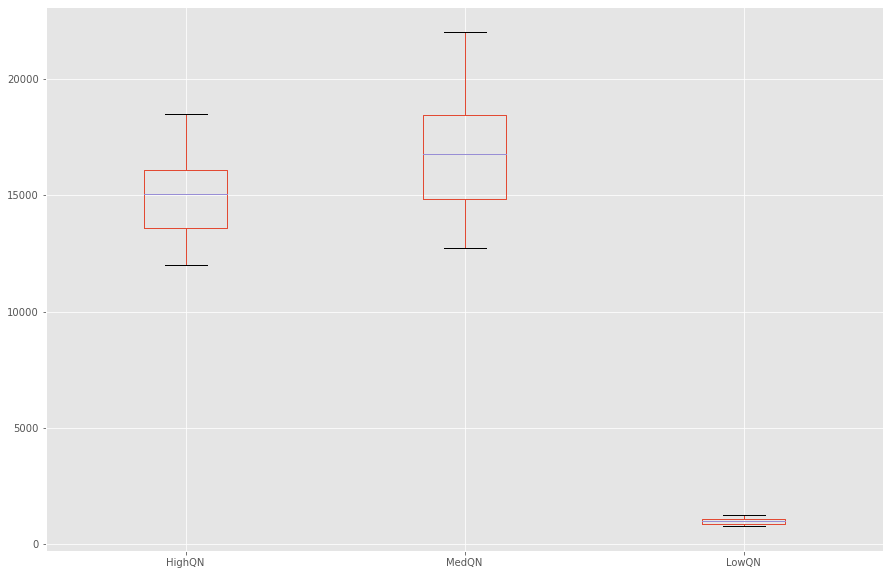

In [37]:
# Lets plot a Box Plot for the sample size
df_cal[["HighQN", "MedQN", "LowQN"]].plot(kind = "box")


- What if we want to show the price in all the states in the year 2014?

In [38]:
# Select only the year 2014
df_2014 = df[df["year"] == 2014]
df_2014.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,2014
765,Alabama,339.20,1043,198.64,933,149.49,123,2014-01-02,2014
1479,Alabama,339.20,1043,198.64,933,148.48,124,2014-01-03,2014
2244,Alabama,339.20,1043,198.43,934,148.48,124,2014-01-04,2014
3009,Alabama,339.32,1046,198.13,936,148.48,124,2014-01-05,2014


In [39]:
# Lets use pivot tables to get HighQ values for each Date by each State
df_states = pd.pivot_table(df_2014, values = "HighQ", index = "date", columns = "State")
df_states.head()


State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,339.06,288.75,303.31,361.85,248.78,236.31,347.90,373.18,352.26,306.43,...,387.8,359.75,343.33,291.54,379.88,374.01,236.03,360.80,357.99,355.90
2014-01-02,339.20,289.67,303.36,361.85,248.67,236.20,347.84,373.18,352.02,306.35,...,387.8,359.75,343.35,291.70,379.88,373.62,236.13,359.80,358.19,355.90
2014-01-03,339.20,289.14,303.31,361.37,248.67,236.31,347.89,373.18,351.40,306.21,...,387.8,359.84,343.26,291.61,379.76,373.77,236.03,360.72,358.08,354.03
2014-01-04,339.20,289.14,303.22,361.21,248.65,236.07,347.89,373.35,351.40,306.11,...,387.8,359.74,343.23,291.78,379.76,373.72,236.03,361.11,358.04,354.03
2014-01-05,339.32,289.14,303.22,361.21,248.68,236.14,347.79,373.35,352.18,306.12,...,387.8,359.68,343.14,291.56,379.76,373.77,235.97,361.11,358.18,354.03


<AxesSubplot:xlabel='date'>

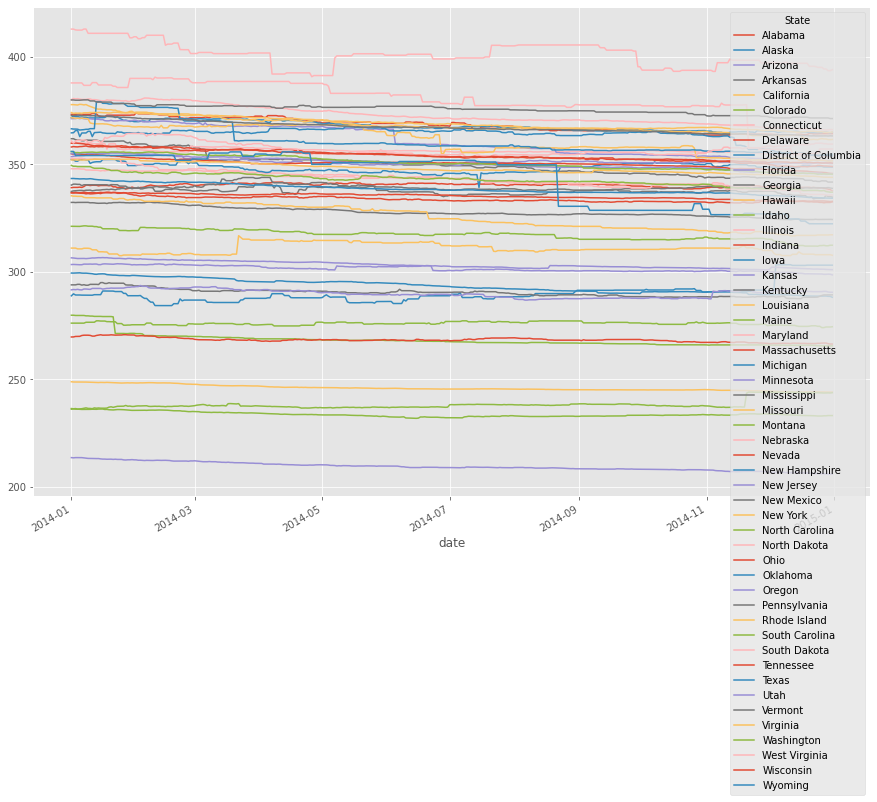

In [40]:
# Lets plot of these lines
df_states.plot()

<AxesSubplot:xlabel='date'>

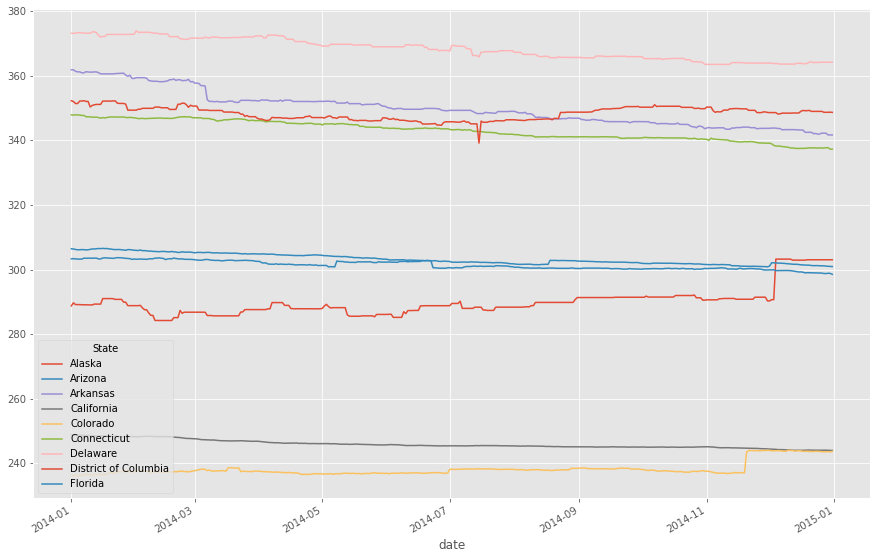

In [41]:
df_states.iloc[:,1:10].plot()


- What if we group by State and plot
- df_2014.groupby("State").plot(x = "date", y = "HighQ")

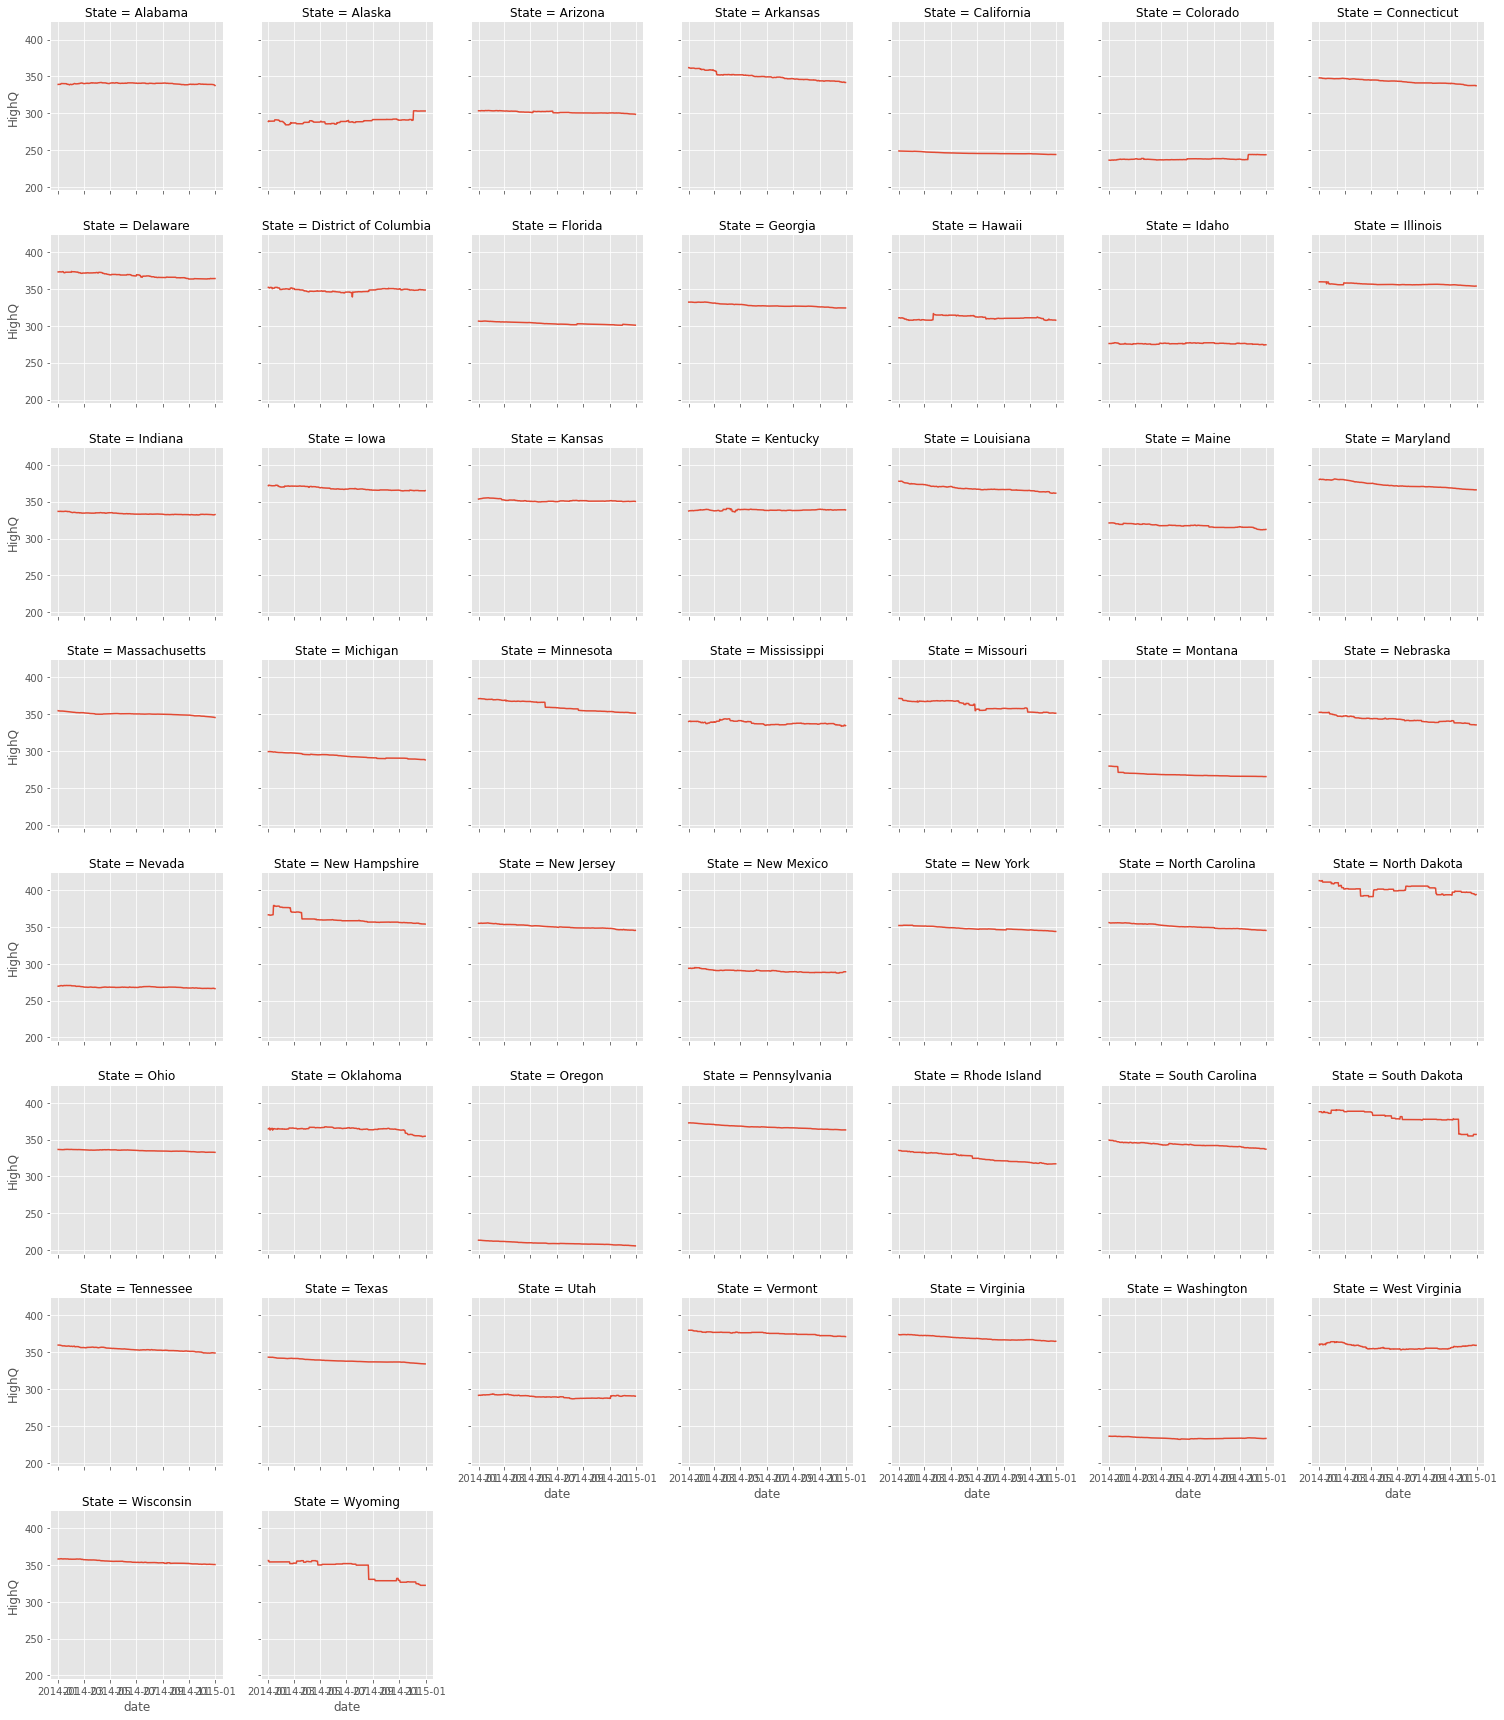

In [42]:
# Arrange in a grid fashion
grid = sns.FacetGrid(df_2014, col = "State", col_wrap = 7)
grid.map(plt.plot, "date", "HighQ")

## Single Variable - Categorical

In [43]:
df_demo.head()


,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


<AxesSubplot:ylabel='total_population'>

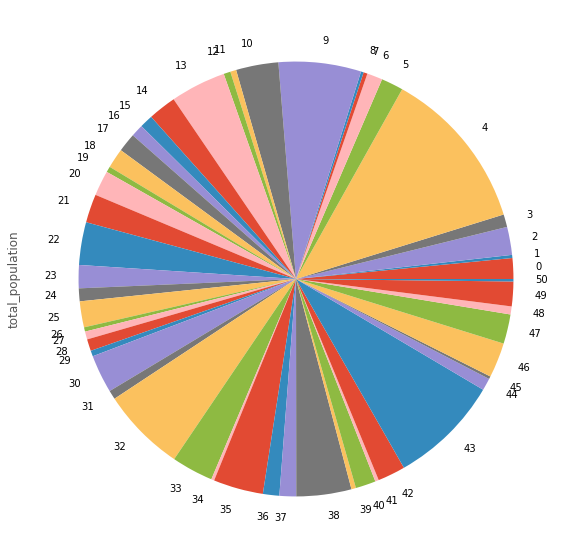

In [44]:
# DO NOT make pie charts, especially when the number of category is greater than 6
df_demo.total_population.plot(kind = "pie")


<AxesSubplot:>

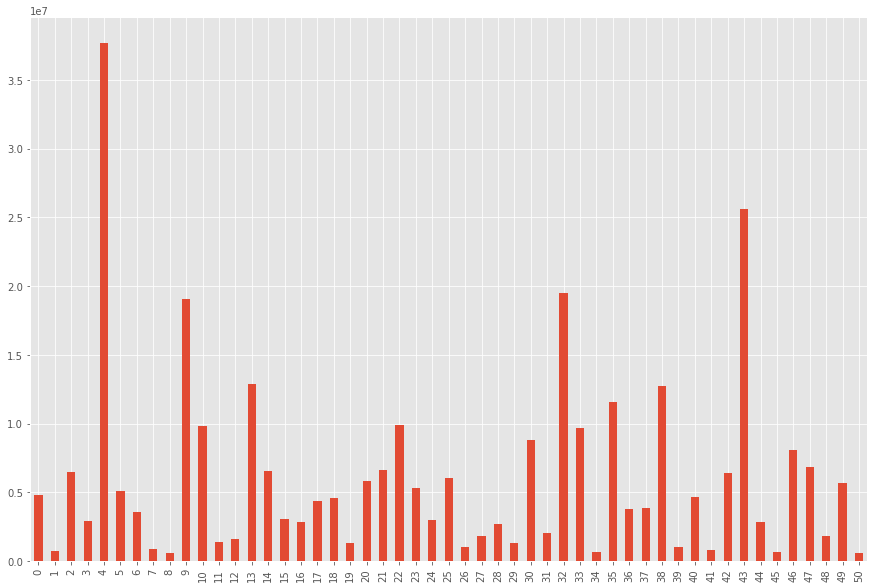

In [45]:
# Lets plot this in a simple bar chart
df_demo.total_population.plot(kind ="bar")


In [48]:
# Lets sort the columns to make them in ascending order
df_demo.sort_values('total_population', ascending = True, inplace = True)
df_demo.head()


,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
50,wyoming,570134,85,1,1,9,28902,647,36.8
8,district of columbia,619371,35,49,3,10,45290,1154,33.8
45,vermont,625904,94,1,1,2,29167,754,42.0
34,north dakota,689781,88,1,1,2,29732,564,36.4
1,alaska,720316,63,3,5,6,32651,978,33.6


<AxesSubplot:>

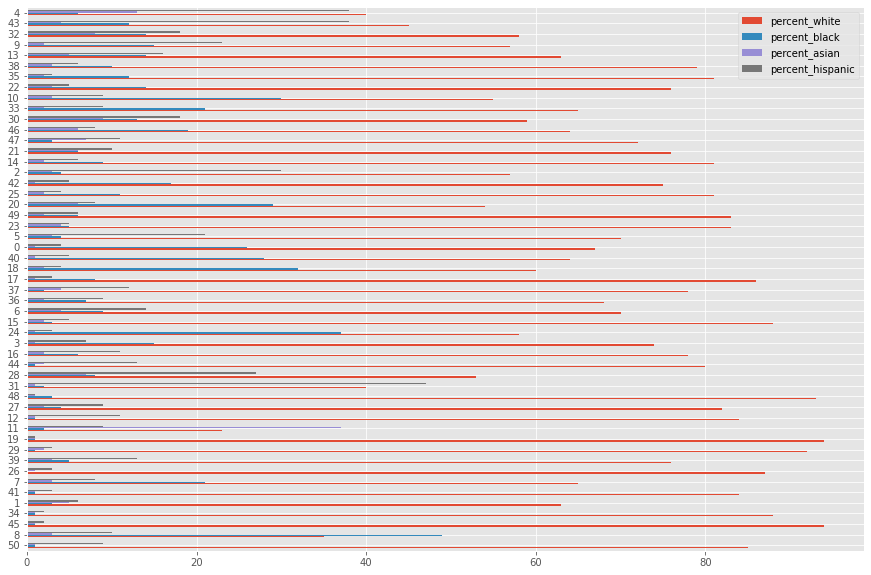

In [49]:
# Lets plot the percentage population
df_demo.iloc[:,2:6].plot(kind = "barh")

<AxesSubplot:>

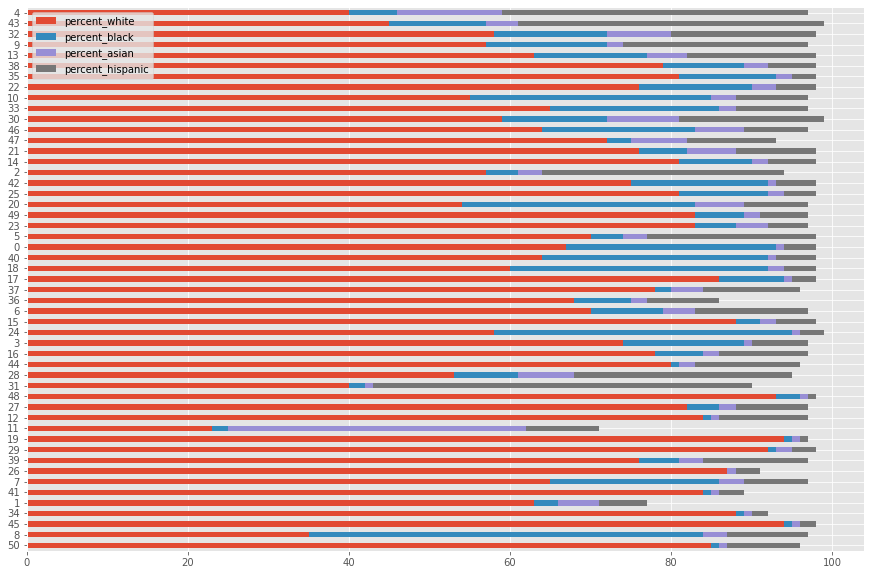

In [50]:
# Lets stack the percentage population
df_demo.iloc[:,2:6].plot(kind = "barh", stacked = True)

<AxesSubplot:>

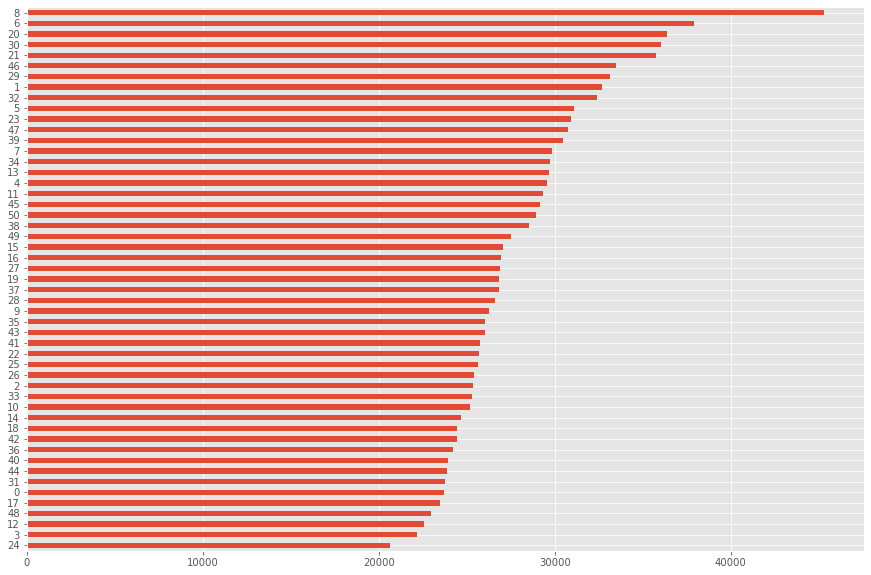

In [52]:
# Lets plot the Per Capita Income 
df_demo.sort_values('per_capita_income', ascending=True).per_capita_income.plot(kind = "barh")


## Lets see if there is a relationship between per_capita_income and percent_white


<AxesSubplot:xlabel='per_capita_income', ylabel='percent_white'>

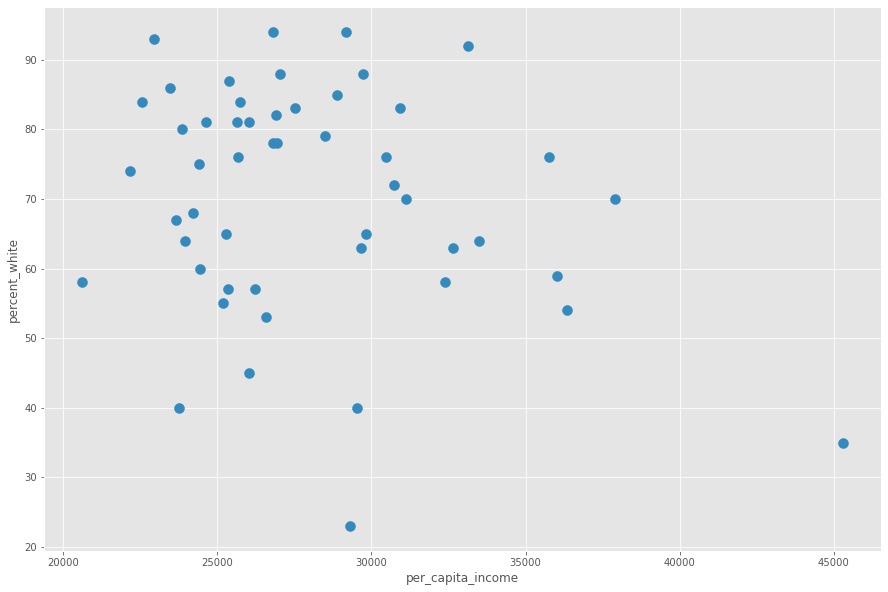

In [53]:
# Scatter - per_capita_income and percent_white
df_demo.plot(kind = "scatter", x = "per_capita_income", y = "percent_white", s = 100)

Lets plot in the Geographic Coordinates (without using maps)

In [54]:
# Lets get the latitude and longitude for each of the state
df_geo = pd.read_csv("State_Location.csv")
df_geo.head()

,region,state,latitude,longitude,status
0,alaska,AK,61.3850,-152.2683,legal
1,alabama,AL,32.7990,-86.8073,medical-limited
2,arkansas,AR,34.9513,-92.3809,illegal
3,arizona,AZ,33.7712,-111.3877,medical
4,california,CA,36.1700,-119.7462,decriminalized+medical


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

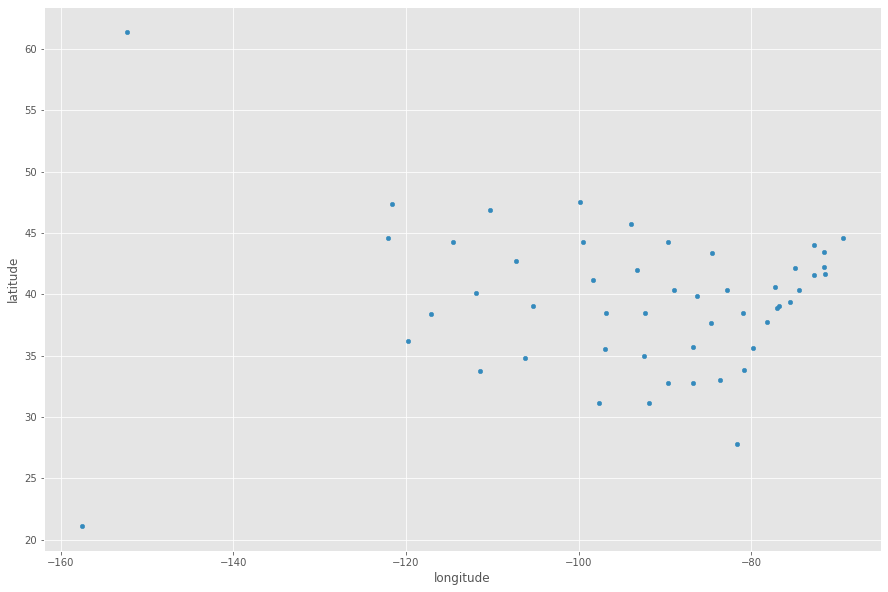

In [55]:
# Lets draw the states as a point
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

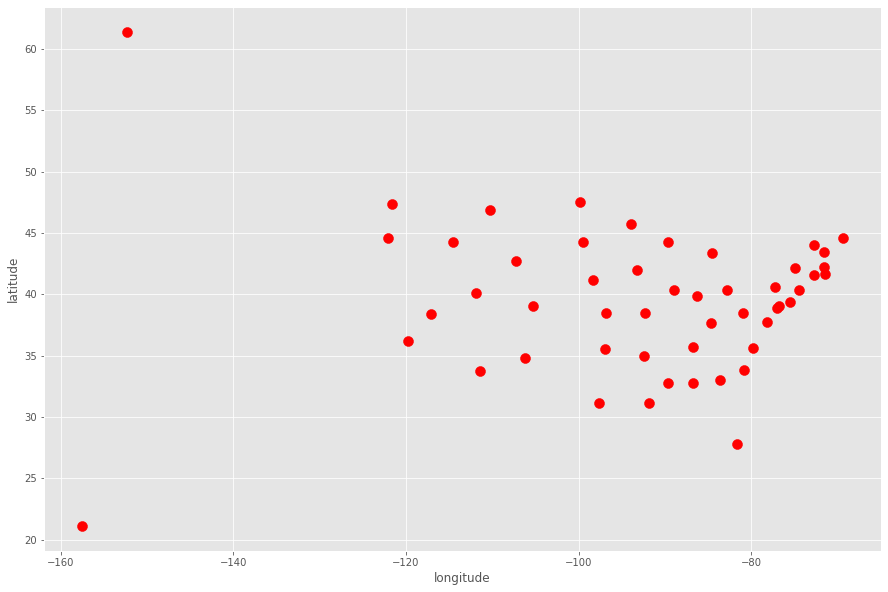

In [56]:
# Lets change the color of the dot and increase the size
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

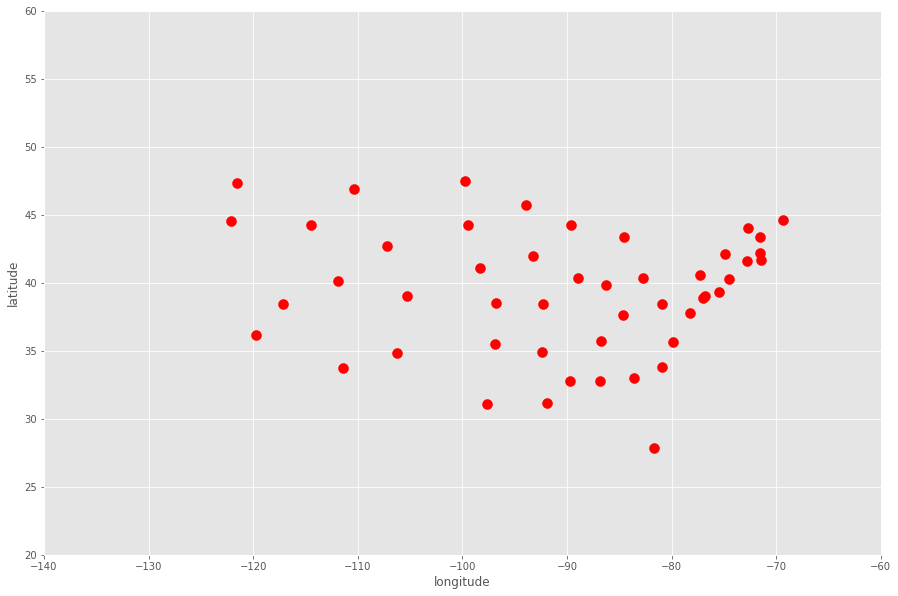

In [57]:
# Lets zoom in to the mainland USA

df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100,
            xlim = (-140,-60), ylim = (20,60))


In [58]:
# Lets plot some data on this plot
df_demo_geo = pd.merge(df_demo, df_geo, on = "region")
df_demo_geo.index = df_demo_geo.region
df_demo_geo.head()


,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,state,latitude,longitude,status
region,,,,,,,,,,,,,
wyoming,wyoming,570134,85,1,1,9,28902,647,36.8,WY,42.7475,-107.2085,illegal
district of columbia,district of columbia,619371,35,49,3,10,45290,1154,33.8,DC,38.8964,-77.0262,legal
vermont,vermont,625904,94,1,1,2,29167,754,42.0,VT,44.0407,-72.7093,decriminalized+medical
north dakota,north dakota,689781,88,1,1,2,29732,564,36.4,ND,47.5362,-99.7930,illegal
alaska,alaska,720316,63,3,5,6,32651,978,33.6,AK,61.3850,-152.2683,legal


In [59]:
df_demo_geo.index = df_demo_geo.region
df_demo_geo.iloc[:,10:12].head()


,latitude,longitude
region,,
wyoming,42.7475,-107.2085
district of columbia,38.8964,-77.0262
vermont,44.0407,-72.7093
north dakota,47.5362,-99.7930
alaska,61.3850,-152.2683


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

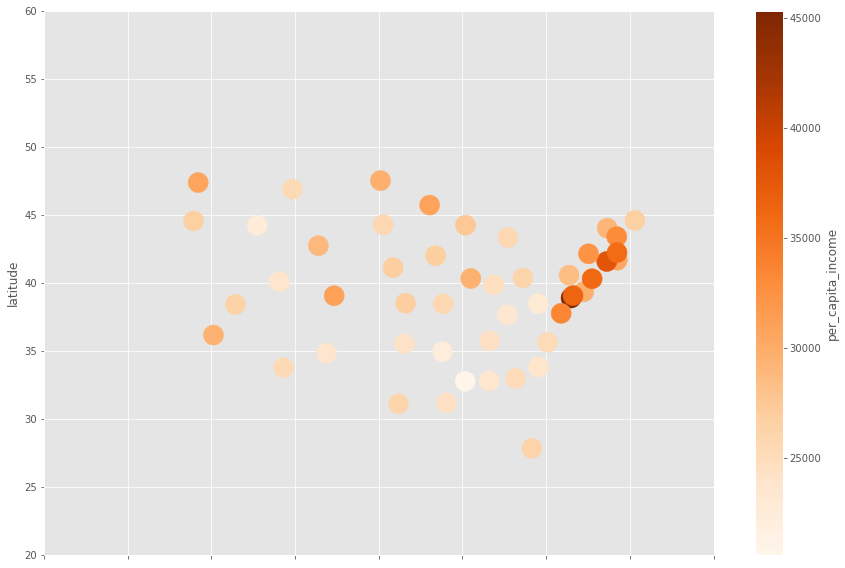

In [60]:
# Lets draw a scatter plot
df_demo_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "per_capita_income", s = 400,
                 xlim = (-140,-60), ylim = (20,60), colormap = "Oranges")
